In [2]:
from pathlib import Path
from glob import glob
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import make_interp_spline, BSpline

# interactive plots
%matplotlib widget

import matrix_r  # module to calculate of matriz distance
import functions  # module with all the individuals function to do analysis
import distance_matrix
import atoms_index_list
import histogram
from atoms_transfer import stern_limbach

In [3]:
working_dir: Path = Path("/home/edison/repositories/radial_distribution/zora_so")

if not working_dir.exists():
    working_dir.mkdir()


In [4]:
dir_water: Path = Path(
    "/home/edison/repositories/radial_distribution/files_xyz/others/water"
)

files_ice: list = glob(str(dir_water / "ice_ih" / "w_iceih.xyz"))
files_water4: list = glob(str(dir_water / "w4" / "w*.xyz"))
files_water5: list = glob(str(dir_water / "w5" / "w*.xyz"))
files_water6: list = glob(str(dir_water / "w6" / "w*.xyz"))
# files_water7: list = glob(str(dir_water / "w7" / "w*.xyz"))
files_water7: list = glob(str(dir_water / "w*" / "w*.xyz"))

coordinates_ice: list = functions.dict_coordinates_xyz(files_ice)
coordinates_water4: list = functions.dict_coordinates_xyz(files_water4)
coordinates_water5: list = functions.dict_coordinates_xyz(files_water5)
coordinates_water6: list = functions.dict_coordinates_xyz(files_water6)
coordinates_water7: list = functions.dict_coordinates_xyz(files_water7)


files_w1: list = glob(str(working_dir / "w1s*.xyz"))
files_w2: list = glob(str(working_dir / "w2s*.xyz"))
files_w3: list = glob(str(working_dir / "w3s*.xyz"))
files_w4: list = glob(str(working_dir / "w4s*.xyz"))
files_w5: list = glob(str(working_dir / "w5s*.xyz"))
files_w6: list = glob(str(working_dir / "w6s*.xyz"))

coordinates_w1: dict = functions.dict_coordinates_xyz(files_w1)
coordinates_w2: dict = functions.dict_coordinates_xyz(files_w2)
coordinates_w3: dict = functions.dict_coordinates_xyz(files_w3)
coordinates_w4: dict = functions.dict_coordinates_xyz(files_w4)
coordinates_w5: dict = functions.dict_coordinates_xyz(files_w5)
coordinates_w6: dict = functions.dict_coordinates_xyz(files_w6)

coordinates_w1


{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   element  x-coordinate  y-coordinate  z-coordinate
 0      Hg     -0.225130      0.010739       0.00000
 1       O      1.821376     -0.090165       0.00000
 2       H      2.325945      0.187310       0.79892
 3       H      2.325945      0.177310      -0.79892}

In [5]:
distances_dict_ice: dict = distance_matrix.distance_matrix(coordinates_ice, (0, 0, 0))
distances_dict_water4: dict = distance_matrix.distance_matrix(
    coordinates_water4, (0, 0, 0)
)
distances_dict_water5: dict = distance_matrix.distance_matrix(
    coordinates_water5, (0, 0, 0)
)
distances_dict_water6: dict = distance_matrix.distance_matrix(
    coordinates_water6, (0, 0, 0)
)
distances_dict_water7: dict = distance_matrix.distance_matrix(
    coordinates_water7, (0, 0, 0)
)

distances_dict_w1: dict = distance_matrix.distance_matrix(coordinates_w1, (0, 0, 0))
distances_dict_w2: dict = distance_matrix.distance_matrix(coordinates_w2, (0, 0, 0))
distances_dict_w3: dict = distance_matrix.distance_matrix(coordinates_w3, (0, 0, 0))
distances_dict_w4: dict = distance_matrix.distance_matrix(coordinates_w4, (0, 0, 0))
distances_dict_w5: dict = distance_matrix.distance_matrix(coordinates_w5, (0, 0, 0))
distances_dict_w6: dict = distance_matrix.distance_matrix(coordinates_w6, (0, 0, 0))

distances_dict_w1


{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   atoms         0         1         2         3
 0    Hg  0.000000  2.048992  2.679073  2.678433
 1     O  2.048992  0.000000  0.984812  0.982042
 2     H  2.679073  0.984812  0.000000  1.597871
 3     H  2.678433  0.982042  1.597871  0.000000}

In [6]:
grid = (0.8, 2, 0.01)

# - number of bins for the accurences
rmin, rmax, dr = grid
nbins = int((rmax - rmin) / dr)


In [7]:
atoms_list: list = ["O", "H", "O"]  # proton transfer

atoms_index_dict_ice: dict = atoms_index_list.atoms_index_dict(
    distances_dict_ice, atoms_list, grid
)
atoms_index_dict_water4: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water4, atoms_list, grid
)
atoms_index_dict_water5: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water5, atoms_list, grid
)
atoms_index_dict_water6: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water6, atoms_list, grid
)
atoms_index_dict_water7: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water7, atoms_list, grid
)

atoms_index_dict_w1: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w1, atoms_list, grid
)
atoms_index_dict_w2: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w2, atoms_list, grid
)
atoms_index_dict_w3: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w3, atoms_list, grid
)
atoms_index_dict_w4: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w4, atoms_list, grid
)
atoms_index_dict_w5: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w5, atoms_list, grid
)
atoms_index_dict_w6: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w6, atoms_list, grid
)

atoms_index_dict_w3


{'/home/edison/repositories/radial_distribution/zora_so/w3s2.xyz': [],
 '/home/edison/repositories/radial_distribution/zora_so/w3s3.xyz': [(1, 6, 4),
  (4, 5, 7)],
 '/home/edison/repositories/radial_distribution/zora_so/w3s1.xyz': [(4, 5, 7)]}

In [8]:
transfer_w1: list = stern_limbach(atoms_index_dict_w1, atoms_list, distances_dict_w1)
transfer_w2: list = stern_limbach(atoms_index_dict_w2, atoms_list, distances_dict_w2)
transfer_w3: list = stern_limbach(atoms_index_dict_w3, atoms_list, distances_dict_w3)
transfer_w4: list = stern_limbach(atoms_index_dict_w4, atoms_list, distances_dict_w4)
transfer_w5: list = stern_limbach(atoms_index_dict_w5, atoms_list, distances_dict_w5)
transfer_w6: list = stern_limbach(atoms_index_dict_w6, atoms_list, distances_dict_w6)

transfer_ice: list = stern_limbach(atoms_index_dict_ice, atoms_list, distances_dict_ice)
transfer_water4: list = stern_limbach(
    atoms_index_dict_water4, atoms_list, distances_dict_water4
)
transfer_water5: list = stern_limbach(
    atoms_index_dict_water5, atoms_list, distances_dict_water5
)
transfer_water6: list = stern_limbach(
    atoms_index_dict_water6, atoms_list, distances_dict_water6
)
transfer_water7: list = stern_limbach(
    atoms_index_dict_water7, atoms_list, distances_dict_water7
)


In [9]:
transfer_w3


{'q1': [0.09286046862432795, 0.14059418946778834, 0.18643117296449774],
 'q2': [2.4449218384896234, 2.4776340961751355, 2.5115242251394525]}

In [10]:
# - saving histogram
distribution = np.linspace(rmin, rmax, nbins, endpoint=False)


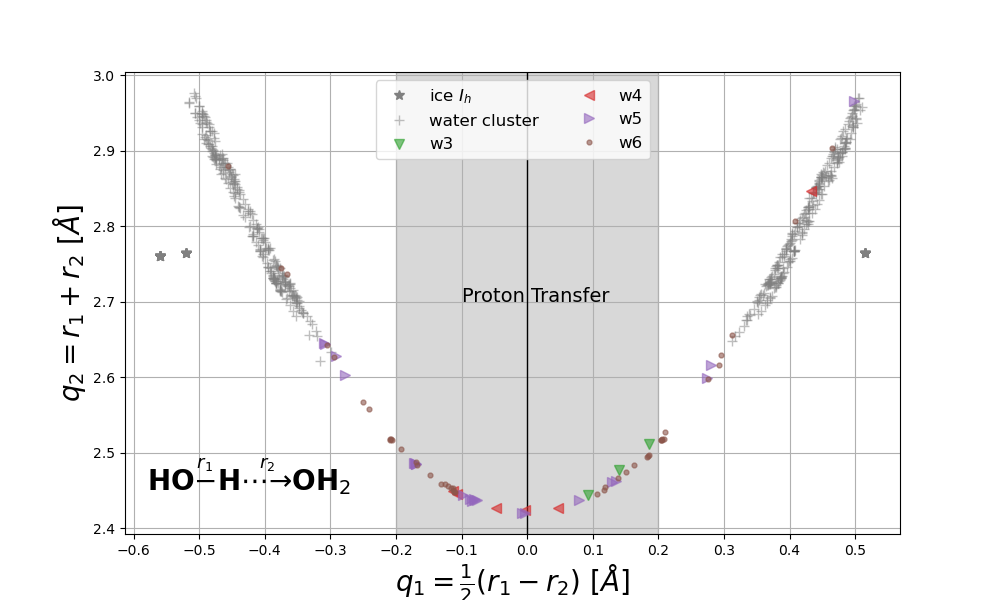

In [19]:
fig = plt.figure(figsize=(10, 6))

# ax = brokenaxes(ylims=((0, 0.25),(0.95, 1.05)), hspace=.2)
ax = fig.add_subplot(111)
ax.grid(b=True, which="major")

# - lines style in a for loop
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-d'] #, '-h', '-p', '-D', '-H']
lines = ["s", "^", "v", "<", ">", ".", "s", "d", "o"]  # , '-h', '-p', '-D', '-H']
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-+', '-x', '-d', '-1', '-2', '-3', '-4', '-h', '-p', '-|', '-_', '-D', '-H']
# lines = ["-","--","-.",":"]
linecycler = cycle(lines)

cm = cycle(
    [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#e377c2",
        "#7f7f7f",
        "#bcbd22",
        "#17becf",
    ]
)

# ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)
ax.axvline(x=0.0, color='black', linestyle='-', linewidth=1)

ax.plot(
    # -np.abs(transfer_ice["q1"]),
    transfer_ice["q1"],
    transfer_ice["q2"],
    "*",
    # next(linecycler),
    color="gray",
    label=r"ice $I_h$",
    markersize=7,
    # alpha=0.5,
    # color="black",
    # markerfacecolor="none",
)
# ax.plot(
#     transfer_water4["q1"],
#     transfer_water4["q2"],
#     # "o",
#     next(linecycler),
#     color="b",
#     label="water tetramer",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     transfer_water5["q1"],
#     transfer_water5["q2"],
#     # "o",
#     next(linecycler),
#     color="b",
#     label="water pentamer",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     transfer_water6["q1"],
#     transfer_water6["q2"],
#     # "o",
#     next(linecycler),
#     color="b",
#     label="water hexamer",
#     markersize=7,
#     alpha=0.3,
#     # color="black",
#     # markerfacecolor="none",
#     )
ax.plot(
    # -np.abs(transfer_water7["q1"]),
    transfer_water7["q1"],
    transfer_water7["q2"],
    "+",
    # next(linecycler),
    color="gray",
    label="water cluster",
    markersize=7,
    alpha=0.5,
    # color="black",
    # markerfacecolor="none",
)

# ax.plot(
#     transfer_w1["q1"],
#     transfer_w1["q2"],
#     # "-",
next(linecycler),
# color=next(cm),
next(cm)
#     label="w1",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     transfer_w2["q1"],
#     transfer_w2["q2"],
#     # "-",
next(linecycler),
# color=next(cm),
next(cm)
#     label="w2",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
# )
ax.plot(
    transfer_w3["q1"],
    transfer_w3["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="w3",
    markersize=7,
    alpha=0.6,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_w4["q1"],
    transfer_w4["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="w4",
    markersize=7,
    alpha=0.6,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_w5["q1"],
    transfer_w5["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="w5",
    markersize=7,
    alpha=0.6,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_w6["q1"],
    transfer_w6["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="w6",
    markersize=7,
    alpha=0.6,
    # color="black",
    # markerfacecolor="none",
)

# plt.xlim(-0.6, 0.4)
# plt.ylim(0.001, 1.1)

ax.xaxis.set_major_locator(MultipleLocator(0.1))

# - legends for the main plot
ax.set_xlabel(r"$q_1=\frac{1}{2}(r_1-r_2) ~[\AA]$", fontsize=20)
ax.set_ylabel(r"$q_2=r_1+r_2 ~[\AA]$", fontsize=20)

plt.legend(loc="upper center", fontsize=12, ncol=2)

ax.annotate(
    f"Proton Transfer",
    xy=(-0.1, 2.7),
    xycoords="data",
    fontsize=14,
)

ax.axvspan(-0.2, 0.2, alpha=0.3, color="gray")

ax.annotate(
    # f'{atoms_list[0]}'r'$-$'f'{atoms_list[1]}'r'$\cdots\to$'f'{atoms_list[0]}',
    r"HO$-$H$\cdots\to$OH$_2$",
    xy=(-0.58, 2.45),
    xycoords="data",
    fontsize=20,
    weight="bold",
)

ax.annotate(
    # f'{atoms_list[0]}'r'$-$'f'{atoms_list[1]}'r'$\cdots\to$'f'{atoms_list[0]}',
    r"$~~~r_1 \quad\quad~~r_2$",
    xy=(-0.53, 2.48),
    xycoords="data",
    fontsize=13,
    weight="bold",
)

fig.savefig(
    working_dir / "stern_limbach.pdf",
    dpi=500,
    bbox_inches="tight",
)
